# 추론통계

**※ 용어정리1 ※**

- 데이터 웨어하우스 (ex. DBMS, OpenAPI)
- 데이터마트 (ex. Pandas DataFrame)

- clusterring: 군집분석

- SVM(support vector machine)

----------------------------------------------------
**※ 추론통계 전에 배운 내용 정리 및 향후 배울 개념과의 연관성 서술 ※**

1. 수집 -> 2. ( 전처리 -> EDA ) -> 3. CDA(추론통계)
   - 1.: 실무위주 / 2.: 자격증 시험 실기 유형 1개 / 3.: ADsP에 단골로 나오는 개념들 분포
   - 추정: 통계량(표본평균)을 이용해 모수 즉 모집단의 특성(모집단평균)를 추측하는 과정
     - 점 추정
     - 구간 추정
       - 추정 구간 범위 = 신뢰구간

----------------------------------------------------
**※ 추론통계 거시적 접근 ※**

1. 표본크기 = 데이터 수 (len함수 쓰는거)
2. **추정방법 <- 앞으로 배울거**
3. 데이터 변동성 <- 우리가 어케 할 수 있는 영역 아님

----------------------------------------------------
**※ 추론통계에서 빈도있게 사용할 패키지 안내 ※**

`scipy`: 추론통계 패키지

----------------------------------------------------
**※ 용어정리2 ※**

confidence level(신뢰수준): 0.95, 0.99(주로 의학), 0.60(사회조사)
confidence interval(신뢰구간)
p-value
sample size: n (by len)
DoF(degree of freedom, 자유도): n-1
-> 표본분산: (x-m) / (n-1) (cf. 모분산: x-m/n)
표준오차 = 표본분산 / root(n)

----------------------------------------------------
**※ 10-2 신뢰구간 간단요약 ※**

- 신뢰구간 범위 시각화:
  - by: KDE plot에 신뢰구간 (cmin~cmax) 사이를 칠하는 방법으로 그림

- 데이터분석 목적: 신뢰수준 확인(평균이 신뢰구간 안에 드가 있어야 됨!)
  -  만약 평균이 신뢰구간 벗어났다? 다시 데이터 전처리 또는 셋 바꿔야됨

----------------------------------------------------
# [LAB-10] 1. 신뢰구간

## #01. 신뢰구간 개요

- 표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나
- 목적: 모평균 추정

## #02. 준비작업

### 1. 패키지 참조:

In [1]:
from hossam import load_data
from scipy.stats import t               # t는 객체임
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

In [3]:
origin = load_data('height')
origin.head()

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169


## #02. 신뢰구간 구하기

### 1. 신뢰구간을 구하는 데 필요한 값 산출

#### (1) 신뢰수준과 대상 데이터:

In [4]:
clevel = 0.95
data = origin['키']

#### (2) 샘플 사이즈:

In [5]:
n = len(data)
n

36

#### (3) DoF(자유도):

- 통계에서의 자유도: n-1
- ex) `x1 + x2 + x3 = 30`이 있을 떄, x1, x2 두 값이 결정되면 나머지 하나는 값이 자동으로 결정 됨
  - 즉, 이 경우 자유롭게 정할 수 있는 값은 2개, 즉 자유도 = 2
- 같은 이유로 표본분산 식의 분모에는 `n` 말고 `n-1`로 나눔!
  - 표본분산 = `{∑(x-m)} / (n-1)`
    - 이유: 표본분산 식에 쓰이는 m을 계산할 때 이미 1개의 자유를 사용했기 떄문
    - 평균이 고정되면 데이터 n개 중 한 값은 자동으로 결정됨

In [6]:
dof = n-1
dof

35

#### (4) 표본평균:

In [7]:
sample_mean = data.mean()
sample_mean

np.float64(167.83333333333334)

#### (5) 표본 표준 편차:

In [8]:
sample_std = data.std()
sample_std

np.float64(7.315345905306578)

#### (6) 표본 표준 '오차':
`sample_std_error = sample_std / root(n)`

In [10]:
sample_std_error = sample_std / sqrt(n)
sample_std_error

np.float64(1.2192243175510964)

### 2. 신뢰구간:
`scipy.stats` 패키지의 `t` 객체가 포함하는 아래의 메서드 사용:
`'interval(신뢰도, 자유도, loc = 샘플평균, scale = 샘플표준오차)'`

In [13]:
cmin, cmax = t.interval(clevel, dof, loc = sample_mean, 
                        scale = sample_std_error)
cmin, cmax

(np.float64(165.35817637995726), np.float64(170.30849028670943))

## #03. 신뢰구간 범위 시각화
- by: KDE plot에 신뢰구간 (cmin~cmax) 사이를 칠하는 방법으로 그림
- 데이터분석 목적: 신뢰수준 확인(평균이 신뢰구간 안에 드가 있어야 됨!)
  -  만약 평균이 신뢰구간 벗어났다? 다시 데이터 전처리 또는 셋 바꿔야됨

C:\Users\itwill\AppData\Local\Temp\ipykernel_20808\3228094776.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')


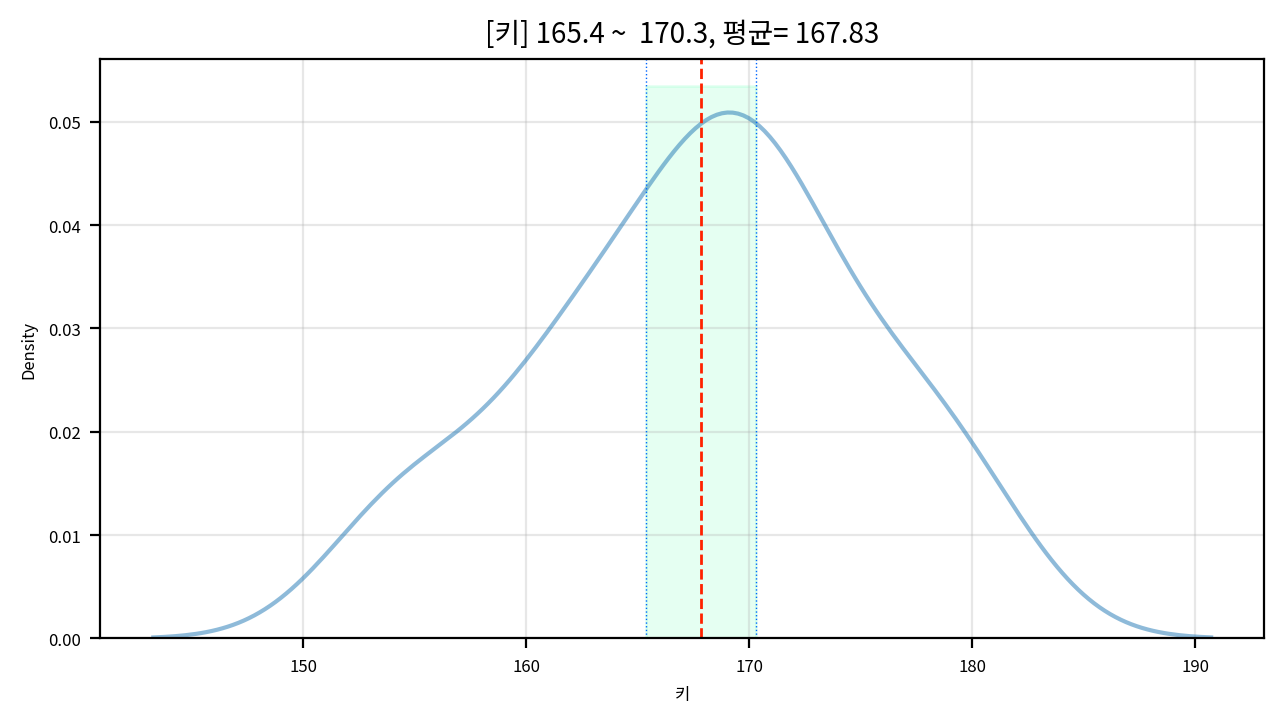

In [15]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) KDE plot 그리기:
sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')

# 2-1) 신뢰구간 범위 (cmin ~ cmax) 그리기:
ax.axvline(cmin, linestyle=":", color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=":", color='#0066ff', linewidth=0.5)

# 2-2) 현재 축 범위 가져오기:
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#00ff88')

# 2-3) 평균 표시:
ax.axvline(sample_mean, linestyle="--", color='#ff2200', linewidth=1)

# 3) 그래프 꾸미기: 
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax: .1f}, 평균={sample_mean: 0.2f}", fontsize = 10)
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료